### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [2]:
import pandas as pd
boston_dataset = pd.read_csv("boston.csv", delimiter=";")
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
from sklearn.model_selection import train_test_split

X = boston_dataset.drop("MEDV", axis=1)
y = boston_dataset.MEDV
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_valid.shape)
X.head()

(404, 13) (102, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from scipy.spatial import distance
from matplotlib import pyplot as plt

%matplotlib inline

(13,)
#0 step with error: -0.119
#1000 step with error: 0.326
#2000 step with error: 0.418
#3000 step with error: 0.480
#4000 step with error: 0.522
#5000 step with error: 0.552
#6000 step with error: 0.573
#7000 step with error: 0.588
#8000 step with error: 0.600
#9000 step with error: 0.608
#10000 step with error: 0.614
Stopped at 10494 step with error: 0.617


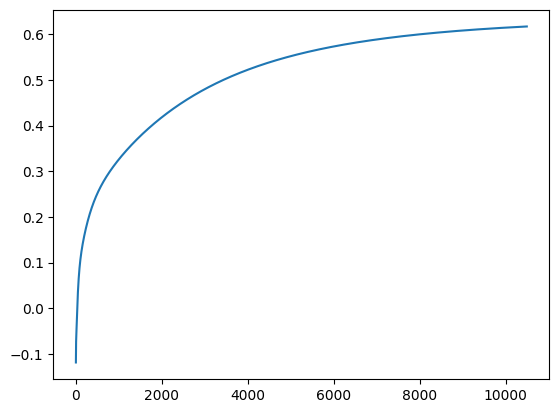

In [53]:
sgd_regressor = SGDRegressor(learning_rate="constant", eta0=0.000001, fit_intercept=True, random_state=2)
w_current, epsilon = np.random.random(X.shape[1]), 0.0001
weight_evolution = []
r2_evolution = []

print(w_current.shape)

for step in range(100000):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(
        distance.euclidean(w_current, sgd_regressor.coef_)
    )
    if weight_evolution[-1] < epsilon:
        print(f"Stopped at {step} step with error: {r2_score(y_valid, sgd_regressor.predict(X_valid)):.3f}")
        break
    r2_evolution.append(
        r2_score(y_valid, sgd_regressor.predict(X_valid))
    )
    w_current = sgd_regressor.coef_.copy()
    if step % 1000 == 0:
        print(f"#{step} step with error: {r2_score(y_valid, sgd_regressor.predict(X_valid)):.3f}")
plt.plot(range(len(r2_evolution)), r2_evolution)
plt.show()

---

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.